In [2]:
import pandas as pd

from config.config import YOUTUBE_API_KEY
from googleapiclient.discovery import build
from api_metod import kanal_bilgi
from api_metod import kanal_bilgi, collect_video_ids
from api_metod import collect_video_detay


import seaborn as sns
import matplotlib.pyplot as plt
import isodate
from dateutil import parser

In [3]:
# Bu kod, YouTube Data API v3 kullanarak YouTube verilerine erişmek için bir API istemcisini oluşturur.
#hangi apinin kullanılacağını belirtir
api_service_name = "youtube" 
#sürümünü belirtir
api_version = "v3" 
#build() fonksiyonu, belirtilen API servisi adı, sürümü ve geliştirici anahtarını kullanarak belirtilen servis için bir istemci oluşturur. Bu istemci, YouTube API'sine erişim sağlamak için 
#kullanılır. developerKey argümanı, istemciyi kimliklendirmek ve yetkilendirmek için kullanılan API anahtarını temsil eder. YOUTUBE_API_KEY yerine gerçek API anahtarımızın bilgisi config'de tutuluyor.

youtube = build(api_service_name, api_version, developerKey=YOUTUBE_API_KEY)

In [4]:
#channel to analyze
kanal_ids=[
"UC0FbGd0UxcgIHcbFlxUWrag",
]

In [5]:
kanal_bilgileri=kanal_bilgi(youtube, kanal_ids)

In [6]:
kanal_bilgileri

,channelName,published,subscribers,views,totalVideos,playlistId
0,Coder,2020-01-26T15:10:10.015715Z,3100,92833,46,UU0FbGd0UxcgIHcbFlxUWrag


In [7]:
playlist_id = kanal_bilgileri.loc[kanal_bilgileri['channelName']== "Coder", "playlistId"].iloc[0]

In [8]:
video_ids = collect_video_ids(youtube, playlist_id)

In [9]:
len(video_ids)

45

In [10]:
video_df=collect_video_detay(youtube,video_ids)

In [11]:
video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
0,OOnaU1NZ3D0,Coder,Böyle içerikler için takip et #keşfet #yazılım...,,None,2023-09-07T11:15:14Z,63,1,None,1,PT32S,hd,false
1,y84h9dpu23s,Coder,Mr Beast Say Lovely 😄 #ai #mrbeast,,None,2023-09-02T10:21:23Z,183,2,None,0,PT37S,hd,false
2,cVLuYcOoeVM,Coder,Çiziminizi resme çeviren yapay zeka #keşfet #y...,,None,2023-09-02T09:38:46Z,81,1,None,2,PT47S,hd,false
3,wNFlLBdjOeY,Coder,Oyunlarımızın linki yorumlarda uzayda seyahat ...,,None,2023-08-15T07:48:35Z,117,4,None,1,PT11S,hd,false
4,FigVM6f4Wh8,Coder,Yapay Zeka Maç Tahminleri,https://play.google.com/store/apps/details?id=...,None,2023-08-15T07:43:29Z,487,2,None,2,PT2M19S,hd,false
5,deSyXsm97dU,Coder,cr7 - Another love Aı Cover,,None,2023-08-09T08:43:31Z,247,5,None,2,PT51S,hd,false
6,yuBRxeKbLsU,Coder,Yapay Zeka İle Elran'e Tanrım Revamı söylettik 😂,,None,2023-07-30T14:53:32Z,64,2,None,0,PT17S,hd,false
7,-IuFdW0Pmx0,Coder,Daha Fazlası Ve Yazılım Öğrenmek için Abone Ol...,,None,2023-07-05T13:55:41Z,712,9,None,4,PT40S,hd,false
8,2J-tC2NvD3w,Coder,Abone ol Böyle İçerikleri Kaçırma😎,,None,2023-07-05T10:38:41Z,92,3,None,0,PT41S,hd,false
9,du7s_EouT8s,Coder,"SMA HASTASI DENİZE DESTEK OL ! (""UNUTMA SENDE ...","SMA HASTASI DENİZE DESTEK OL ! (""UNUTMA SENDE ...",None,2023-06-16T11:49:02Z,5036,16,None,21,PT57S,hd,false


In [12]:
#Veri analizi için bazı işlemler

In [13]:
video_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   video_id        45 non-null     object
 1   channelTitle    45 non-null     object
 2   title           45 non-null     object
 3   description     45 non-null     object
 4   tags            6 non-null      object
 5   publishedAt     45 non-null     object
 6   viewCount       45 non-null     object
 7   likeCount       45 non-null     object
 8   favouriteCount  0 non-null      object
 9   commentCount    45 non-null     object
 10  duration        45 non-null     object
 11  definition      45 non-null     object
 12  caption         45 non-null     object
dtypes: object(13)
memory usage: 4.7+ KB


In [14]:
#Null değer var mı?
video_df.isnull().any()

video_id          False
channelTitle      False
title             False
description       False
tags               True
publishedAt       False
viewCount         False
likeCount         False
favouriteCount     True
commentCount      False
duration          False
definition        False
caption           False
dtype: bool

In [15]:
video_df.head()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
0,OOnaU1NZ3D0,Coder,Böyle içerikler için takip et #keşfet #yazılım...,,None,2023-09-07T11:15:14Z,63,1,None,1,PT32S,hd,false
1,y84h9dpu23s,Coder,Mr Beast Say Lovely 😄 #ai #mrbeast,,None,2023-09-02T10:21:23Z,183,2,None,0,PT37S,hd,false
2,cVLuYcOoeVM,Coder,Çiziminizi resme çeviren yapay zeka #keşfet #y...,,None,2023-09-02T09:38:46Z,81,1,None,2,PT47S,hd,false
3,wNFlLBdjOeY,Coder,Oyunlarımızın linki yorumlarda uzayda seyahat ...,,None,2023-08-15T07:48:35Z,117,4,None,1,PT11S,hd,false
4,FigVM6f4Wh8,Coder,Yapay Zeka Maç Tahminleri,https://play.google.com/store/apps/details?id=...,None,2023-08-15T07:43:29Z,487,2,None,2,PT2M19S,hd,false


Veri Seti Temizleme
- Eksik verileri gözden geçirme

In [16]:
#Description Türü string olanları Bilgi Yok şeklinde döndürdük
new_video_df = video_df.applymap(lambda x: 'No Description' if isinstance(x, str) and x == '' else x)
new_video_df.head()

C:\Users\sevgi\AppData\Local\Temp\ipykernel_16196\1845005344.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  new_video_df = video_df.applymap(lambda x: 'No Description' if isinstance(x, str) and x == '' else x)


,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
0,OOnaU1NZ3D0,Coder,Böyle içerikler için takip et #keşfet #yazılım...,No Description,None,2023-09-07T11:15:14Z,63,1,None,1,PT32S,hd,false
1,y84h9dpu23s,Coder,Mr Beast Say Lovely 😄 #ai #mrbeast,No Description,None,2023-09-02T10:21:23Z,183,2,None,0,PT37S,hd,false
2,cVLuYcOoeVM,Coder,Çiziminizi resme çeviren yapay zeka #keşfet #y...,No Description,None,2023-09-02T09:38:46Z,81,1,None,2,PT47S,hd,false
3,wNFlLBdjOeY,Coder,Oyunlarımızın linki yorumlarda uzayda seyahat ...,No Description,None,2023-08-15T07:48:35Z,117,4,None,1,PT11S,hd,false
4,FigVM6f4Wh8,Coder,Yapay Zeka Maç Tahminleri,https://play.google.com/store/apps/details?id=...,None,2023-08-15T07:43:29Z,487,2,None,2,PT2M19S,hd,false


In [17]:
new_video_df['likeCount'] = new_video_df['likeCount'] .astype(int)
new_video_df['viewCount'] = new_video_df['viewCount'] .astype(int)
new_video_df['commentCount'] = new_video_df['commentCount'] .astype(int)

In [18]:
new_video_df.describe()

,viewCount,likeCount,commentCount
count,45.000000,45.000000,45.000000
mean,2062.955556,19.955556,6.688889
std,3326.402786,26.771725,10.920835
min,62.000000,1.000000,0.000000
25%,247.000000,6.000000,0.000000
50%,712.000000,15.000000,2.000000
75%,2142.000000,22.000000,7.000000
max,13859.000000,152.000000,49.000000


In [19]:
new_video_df['publishedAt'] = new_video_df['publishedAt'].apply(lambda x: parser.parse(x)) 
new_video_df['pushblishDayName'] = new_video_df['publishedAt'].apply(lambda x: x.strftime("%A"))



In [20]:

new_video_df['durationSecs'] = new_video_df['duration'].apply(lambda x: isodate.parse_duration(x))
new_video_df['durationSecs'] = new_video_df['durationSecs'].astype('timedelta64[s]')

In [21]:
new_video_df[['durationSecs', 'duration']].head()



,durationSecs,duration
0,0 days 00:00:32,PT32S
1,0 days 00:00:37,PT37S
2,0 days 00:00:47,PT47S
3,0 days 00:00:11,PT11S
4,0 days 00:02:19,PT2M19S


İki yeni method eklendi. İlk method'da 2023 yılına ait verileri filtrelediğimiz bir method oluşturdum. İkinci method'da ise title'da anahtar kelimeye göre filtreleme yapacağımız yeni bir column oluşturdum.

In [22]:
# filter_videos_by_year methodu ile 2023 yılına ait videoların id'lerini getirdik.
from api_metod import filter_videos_by_year
video_details_df = collect_video_detay(youtube, video_ids)

# Methodu kullanarak 2023'e ait videoları seçtik
videos_2023 = filter_videos_by_year(video_details_df, '2023')


videos_2023

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
0,OOnaU1NZ3D0,Coder,Böyle içerikler için takip et #keşfet #yazılım...,,None,2023-09-07T11:15:14Z,63,1,None,1,PT32S,hd,false
1,y84h9dpu23s,Coder,Mr Beast Say Lovely 😄 #ai #mrbeast,,None,2023-09-02T10:21:23Z,183,2,None,0,PT37S,hd,false
2,cVLuYcOoeVM,Coder,Çiziminizi resme çeviren yapay zeka #keşfet #y...,,None,2023-09-02T09:38:46Z,81,1,None,2,PT47S,hd,false
3,wNFlLBdjOeY,Coder,Oyunlarımızın linki yorumlarda uzayda seyahat ...,,None,2023-08-15T07:48:35Z,117,4,None,1,PT11S,hd,false
4,FigVM6f4Wh8,Coder,Yapay Zeka Maç Tahminleri,https://play.google.com/store/apps/details?id=...,None,2023-08-15T07:43:29Z,487,2,None,2,PT2M19S,hd,false
5,deSyXsm97dU,Coder,cr7 - Another love Aı Cover,,None,2023-08-09T08:43:31Z,247,5,None,2,PT51S,hd,false
6,yuBRxeKbLsU,Coder,Yapay Zeka İle Elran'e Tanrım Revamı söylettik 😂,,None,2023-07-30T14:53:32Z,64,2,None,0,PT17S,hd,false
7,-IuFdW0Pmx0,Coder,Daha Fazlası Ve Yazılım Öğrenmek için Abone Ol...,,None,2023-07-05T13:55:41Z,712,9,None,4,PT40S,hd,false
8,2J-tC2NvD3w,Coder,Abone ol Böyle İçerikleri Kaçırma😎,,None,2023-07-05T10:38:41Z,92,3,None,0,PT41S,hd,false
9,du7s_EouT8s,Coder,"SMA HASTASI DENİZE DESTEK OL ! (""UNUTMA SENDE ...","SMA HASTASI DENİZE DESTEK OL ! (""UNUTMA SENDE ...",None,2023-06-16T11:49:02Z,5036,16,None,21,PT57S,hd,false


In [23]:
#Bu method'da title'da python geçenleri ayrı bir column oluşturarak yazdık (Keywords)
from api_metod import add_keyword
new_video_df = add_keyword(new_video_df, 'title', 'python')

new_video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,pushblishDayName,durationSecs,Keywords
0,OOnaU1NZ3D0,Coder,Böyle içerikler için takip et #keşfet #yazılım...,No Description,None,2023-09-07 11:15:14+00:00,63,1,None,1,PT32S,hd,false,Thursday,0 days 00:00:32,python
1,y84h9dpu23s,Coder,Mr Beast Say Lovely 😄 #ai #mrbeast,No Description,None,2023-09-02 10:21:23+00:00,183,2,None,0,PT37S,hd,false,Saturday,0 days 00:00:37,
2,cVLuYcOoeVM,Coder,Çiziminizi resme çeviren yapay zeka #keşfet #y...,No Description,None,2023-09-02 09:38:46+00:00,81,1,None,2,PT47S,hd,false,Saturday,0 days 00:00:47,
3,wNFlLBdjOeY,Coder,Oyunlarımızın linki yorumlarda uzayda seyahat ...,No Description,None,2023-08-15 07:48:35+00:00,117,4,None,1,PT11S,hd,false,Tuesday,0 days 00:00:11,
4,FigVM6f4Wh8,Coder,Yapay Zeka Maç Tahminleri,https://play.google.com/store/apps/details?id=...,None,2023-08-15 07:43:29+00:00,487,2,None,2,PT2M19S,hd,false,Tuesday,0 days 00:02:19,
5,deSyXsm97dU,Coder,cr7 - Another love Aı Cover,No Description,None,2023-08-09 08:43:31+00:00,247,5,None,2,PT51S,hd,false,Wednesday,0 days 00:00:51,
6,yuBRxeKbLsU,Coder,Yapay Zeka İle Elran'e Tanrım Revamı söylettik 😂,No Description,None,2023-07-30 14:53:32+00:00,64,2,None,0,PT17S,hd,false,Sunday,0 days 00:00:17,
7,-IuFdW0Pmx0,Coder,Daha Fazlası Ve Yazılım Öğrenmek için Abone Ol...,No Description,None,2023-07-05 13:55:41+00:00,712,9,None,4,PT40S,hd,false,Wednesday,0 days 00:00:40,
8,2J-tC2NvD3w,Coder,Abone ol Böyle İçerikleri Kaçırma😎,No Description,None,2023-07-05 10:38:41+00:00,92,3,None,0,PT41S,hd,false,Wednesday,0 days 00:00:41,
9,du7s_EouT8s,Coder,"SMA HASTASI DENİZE DESTEK OL ! (""UNUTMA SENDE ...","SMA HASTASI DENİZE DESTEK OL ! (""UNUTMA SENDE ...",None,2023-06-16 11:49:02+00:00,5036,16,None,21,PT57S,hd,false,Friday,0 days 00:00:57,


Veri Keşfi İçin ilk adım veriyi tanıma
- İstatistiksel bir analiz yaparak veri tanıma işlemi

In [24]:
print("Youtube Kanalından Çekilen Sütun Bilgileri:\n")
print(new_video_df.columns)

Youtube Kanalından Çekilen Sütun Bilgileri:

Index(['video_id', 'channelTitle', 'title', 'description', 'tags',
       'publishedAt', 'viewCount', 'likeCount', 'favouriteCount',
       'commentCount', 'duration', 'definition', 'caption', 'pushblishDayName',
       'durationSecs', 'Keywords'],
      dtype='object')


In [25]:
print("Sütun veri tipleri:\n")
print(new_video_df.dtypes)

Sütun veri tipleri:

video_id                             object
channelTitle                         object
title                                object
description                          object
tags                                 object
publishedAt         datetime64[ns, tzutc()]
viewCount                             int32
likeCount                             int32
favouriteCount                       object
commentCount                          int32
duration                             object
definition                           object
caption                              object
pushblishDayName                     object
durationSecs                 timedelta64[s]
Keywords                             object
dtype: object


In [26]:
#İstatistiksel bilgiler için describe methodunu kullanıyoruz
#Varolan sayısal değerlerin istatistiksel bilgilerini aldık
istatistik = new_video_df.describe()
print(istatistik)

          viewCount   likeCount  commentCount     durationSecs
count     45.000000   45.000000     45.000000               45
mean    2062.955556   19.955556      6.688889  0 days 00:04:01
std     3326.402786   26.771725     10.920835  0 days 00:12:46
min       62.000000    1.000000      0.000000  0 days 00:00:07
25%      247.000000    6.000000      0.000000  0 days 00:00:16
50%      712.000000   15.000000      2.000000  0 days 00:01:00
75%     2142.000000   22.000000      7.000000  0 days 00:02:47
max    13859.000000  152.000000     49.000000  0 days 01:25:57


In [27]:
#İzlenme sayısı medyan değer hesaplama
median_df=new_video_df['viewCount'].median()
print("İzlenme sayısı medyanı: ",median_df)

İzlenme sayısı medyanı:  712.0


In [28]:
#Burada istatistiksel bir değer olan skewness değerine bakıyoruz
#Skewness (çarpıklık): veri dağılımı simetrik mi değil mi?
carpiklik = new_video_df['viewCount'].skew()

print(f"{'viewCount'} sütunu için çarpıklık (skewness) değeri: {carpiklik}")

viewCount sütunu için çarpıklık (skewness) değeri: 2.7360673501903903


C:\Users\sevgi\AppData\Local\Temp\ipykernel_16196\3623871158.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(new_video_df['viewCount'], shade=True)


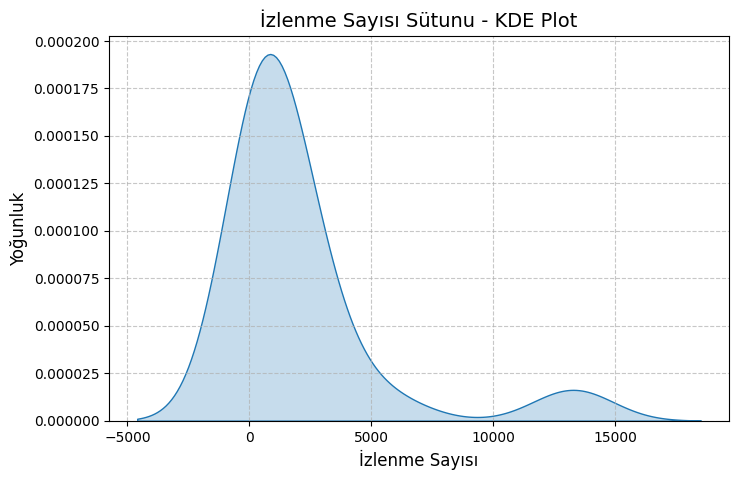

In [92]:
# Bu değeri görselleştirmek için:

plt.figure(figsize=(8, 5))
sns.kdeplot(new_video_df['viewCount'], shade=True)
plt.title(f'İzlenme Sayısı Sütunu - KDE Plot', fontsize=14)
plt.xlabel('İzlenme Sayısı', fontsize=12)
plt.ylabel('Yoğunluk', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Skewness değeri pozitif çıktığı için sağa çarpıklık söz konusu. 
- Veri seti sağa çarpık olduğunda veri seti genellikle ortalamadan daha yüksek olan değerlere sahiptir. 
- Yukarıda median değerini ayrı bir şekilde hesaplamıştık. Skewness'a bakarak da medyan'ın ortalamadan küçük olduğu anlaşılabilir.

In [30]:
#Ortalamadan yüksek çıkan izlenme sayılarına bakmak için:

ortalama_df=new_video_df['viewCount'].mean()

ortalama_ust_degerler=new_video_df[new_video_df['viewCount']>ortalama_df]['viewCount']
#ortalamanın üstünde kalan değerler
ortalama_ust_degerler

9      5036
10    13358
11     3211
18     2761
20     2414
22     2142
37     2659
38     6341
41     3880
42    12606
43    13859
44     2513
Name: viewCount, dtype: int32

In [31]:
ortalama_ustu_degerSayisi=ortalama_ust_degerler.count()
ortalama_ustu_degerSayisi

12

In [82]:
#Burada veriye bakarak bazı keywords belirleyip Keywords colonuna dahil ediyorum.
#Amaç: Başlıkta hangi anahtar kelimeleri kullanınca daha çok izlenmiş bunu öğrenmek ve analiz raporuma eklemek
keywords_to_add = ['python', 'Mr Beast', 'Yapay Zeka','hile','Project','hata']

for keyword in keywords_to_add:
    if keyword.lower() == 'python':
        new_video_df.loc[new_video_df['title'].str.contains(keyword, case=False, na=False), 'Keywords'] = keyword
    else:
        new_video_df.loc[new_video_df['title'].str.contains(keyword, case=False, na=False), 'Keywords'] = keyword

new_video_df['Keywords'].fillna('no info', inplace=True)
new_video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,pushblishDayName,durationSecs,Keywords
0,OOnaU1NZ3D0,Coder,Böyle içerikler için takip et #keşfet #yazılım...,No Description,"#keşfet,#yazılım,#yazılımmühendisliği,#python",2023-09-07 11:15:14+00:00,63,1,None,1,PT32S,hd,false,Thursday,0 days 00:00:32,python
1,y84h9dpu23s,Coder,Mr Beast Say Lovely 😄 #ai #mrbeast,No Description,"#ai,#mrbeast",2023-09-02 10:21:23+00:00,183,2,None,0,PT37S,hd,false,Saturday,0 days 00:00:37,Mr Beast
2,cVLuYcOoeVM,Coder,Çiziminizi resme çeviren yapay zeka #keşfet #y...,No Description,"#keşfet,#yapayzeka,#ai",2023-09-02 09:38:46+00:00,81,1,None,2,PT47S,hd,false,Saturday,0 days 00:00:47,Yapay Zeka
3,wNFlLBdjOeY,Coder,Oyunlarımızın linki yorumlarda uzayda seyahat ...,No Description,no tags,2023-08-15 07:48:35+00:00,117,4,None,1,PT11S,hd,false,Tuesday,0 days 00:00:11,no info
4,FigVM6f4Wh8,Coder,Yapay Zeka Maç Tahminleri,https://play.google.com/store/apps/details?id=...,no tags,2023-08-15 07:43:29+00:00,487,2,None,2,PT2M19S,hd,false,Tuesday,0 days 00:02:19,Yapay Zeka
5,deSyXsm97dU,Coder,cr7 - Another love Aı Cover,No Description,no tags,2023-08-09 08:43:31+00:00,247,5,None,2,PT51S,hd,false,Wednesday,0 days 00:00:51,no info
6,yuBRxeKbLsU,Coder,Yapay Zeka İle Elran'e Tanrım Revamı söylettik 😂,No Description,no tags,2023-07-30 14:53:32+00:00,64,2,None,0,PT17S,hd,false,Sunday,0 days 00:00:17,Yapay Zeka
7,-IuFdW0Pmx0,Coder,Daha Fazlası Ve Yazılım Öğrenmek için Abone Ol...,No Description,no tags,2023-07-05 13:55:41+00:00,712,9,None,4,PT40S,hd,false,Wednesday,0 days 00:00:40,no info
8,2J-tC2NvD3w,Coder,Abone ol Böyle İçerikleri Kaçırma😎,No Description,no tags,2023-07-05 10:38:41+00:00,92,3,None,0,PT41S,hd,false,Wednesday,0 days 00:00:41,no info
9,du7s_EouT8s,Coder,"SMA HASTASI DENİZE DESTEK OL ! (""UNUTMA SENDE ...","SMA HASTASI DENİZE DESTEK OL ! (""UNUTMA SENDE ...",no tags,2023-06-16 11:49:02+00:00,5036,16,None,21,PT57S,hd,false,Friday,0 days 00:00:57,no info


Grafiklerle Veri Görselleştirmesi

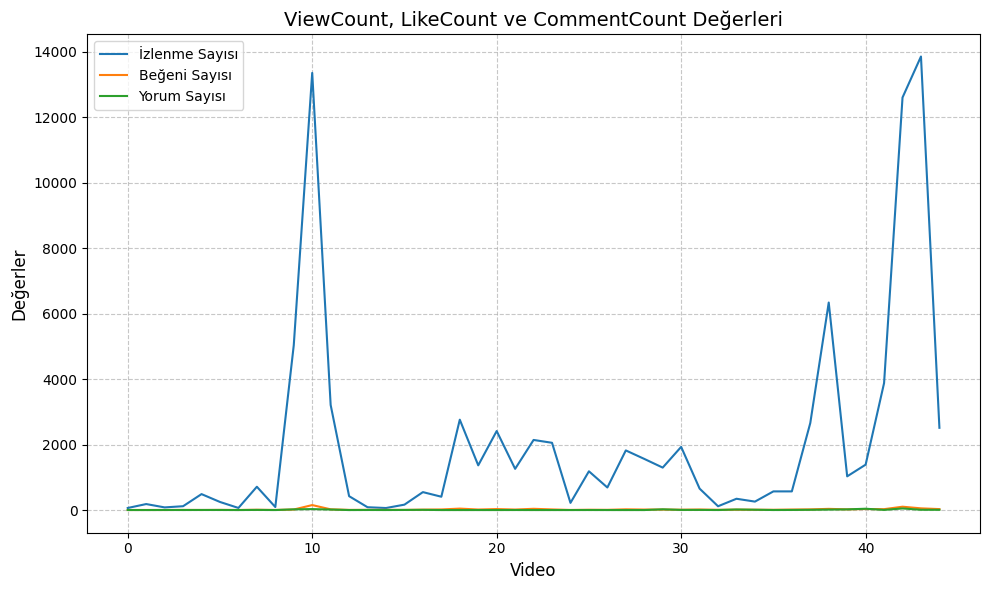

In [32]:
plt.figure(figsize=(10, 6))

# Her bir değeri ayrı ayrı göstermek için line plot kullanalım
plt.plot(new_video_df.index, new_video_df['viewCount'], label='İzlenme Sayısı')
plt.plot(new_video_df.index, new_video_df['likeCount'], label='Beğeni Sayısı')
plt.plot(new_video_df.index, new_video_df['commentCount'], label='Yorum Sayısı')

plt.title('ViewCount, LikeCount ve CommentCount Değerleri', fontsize=14)
plt.xlabel('Video', fontsize=12)
plt.ylabel('Değerler', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7) #Bu özellik grafik güzelleştirme için kullanıldı
plt.tight_layout()
plt.show()

Bu grafiğe bakarak izleme sayısı, beğeni sayısı ve yorum sayısı kıyaslanmıştır. Genel olarak izlenmelerine göre yorum sayısı ve beğeni sayısı az olan bir kanal olduğu sonucuna varabiliriz.

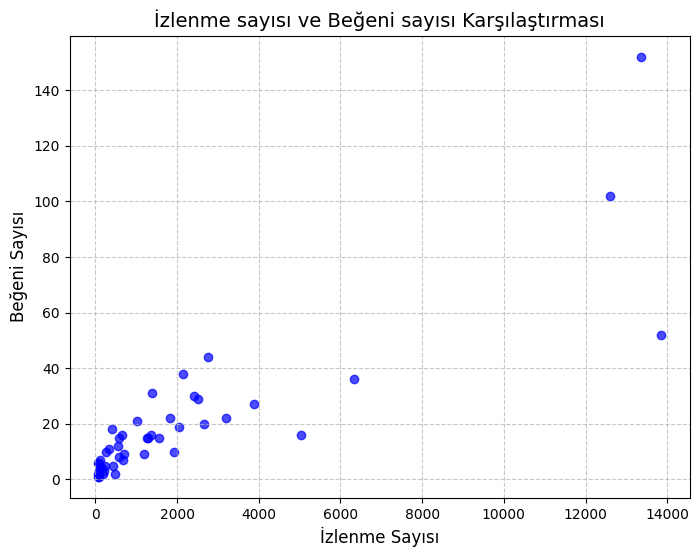

In [89]:
# Scatter plot kullanarak viewCount ve likeCount arası karşılaştırma yapacağız
plt.figure(figsize=(8, 6))
plt.scatter(new_video_df['viewCount'], new_video_df['likeCount'], color='blue', alpha=0.7)
plt.title('İzlenme sayısı ve Beğeni sayısı Karşılaştırması', fontsize=14)
plt.xlabel('İzlenme Sayısı', fontsize=12)
plt.ylabel('Beğeni Sayısı', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7) 
plt.show()

Scatter plot grafiğine bakarak genel olarak izlenme sayısı arttıkça beğeni sayısının da arttığı gözlemleniyor.

C:\Users\sevgi\AppData\Local\Temp\ipykernel_16196\2066212065.py:20: UserWarning: Glyph 128155 (\N{YELLOW HEART}) missing from current font.
  plt.tight_layout()
C:\Users\sevgi\AppData\Local\Temp\ipykernel_16196\2066212065.py:20: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from current font.
  plt.tight_layout()
C:\Users\sevgi\AppData\Local\Temp\ipykernel_16196\2066212065.py:20: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from current font.
  plt.tight_layout()
C:\Users\sevgi\AppData\Local\Temp\ipykernel_16196\2066212065.py:20: UserWarning: Glyph 128591 (\N{PERSON WITH FOLDED HANDS}) missing from current font.
  plt.tight_layout()
c:\Users\sevgi\miniconda3\envs\myenv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128155 (\N{YELLOW HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sevgi\miniconda3\envs\myenv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from current fon

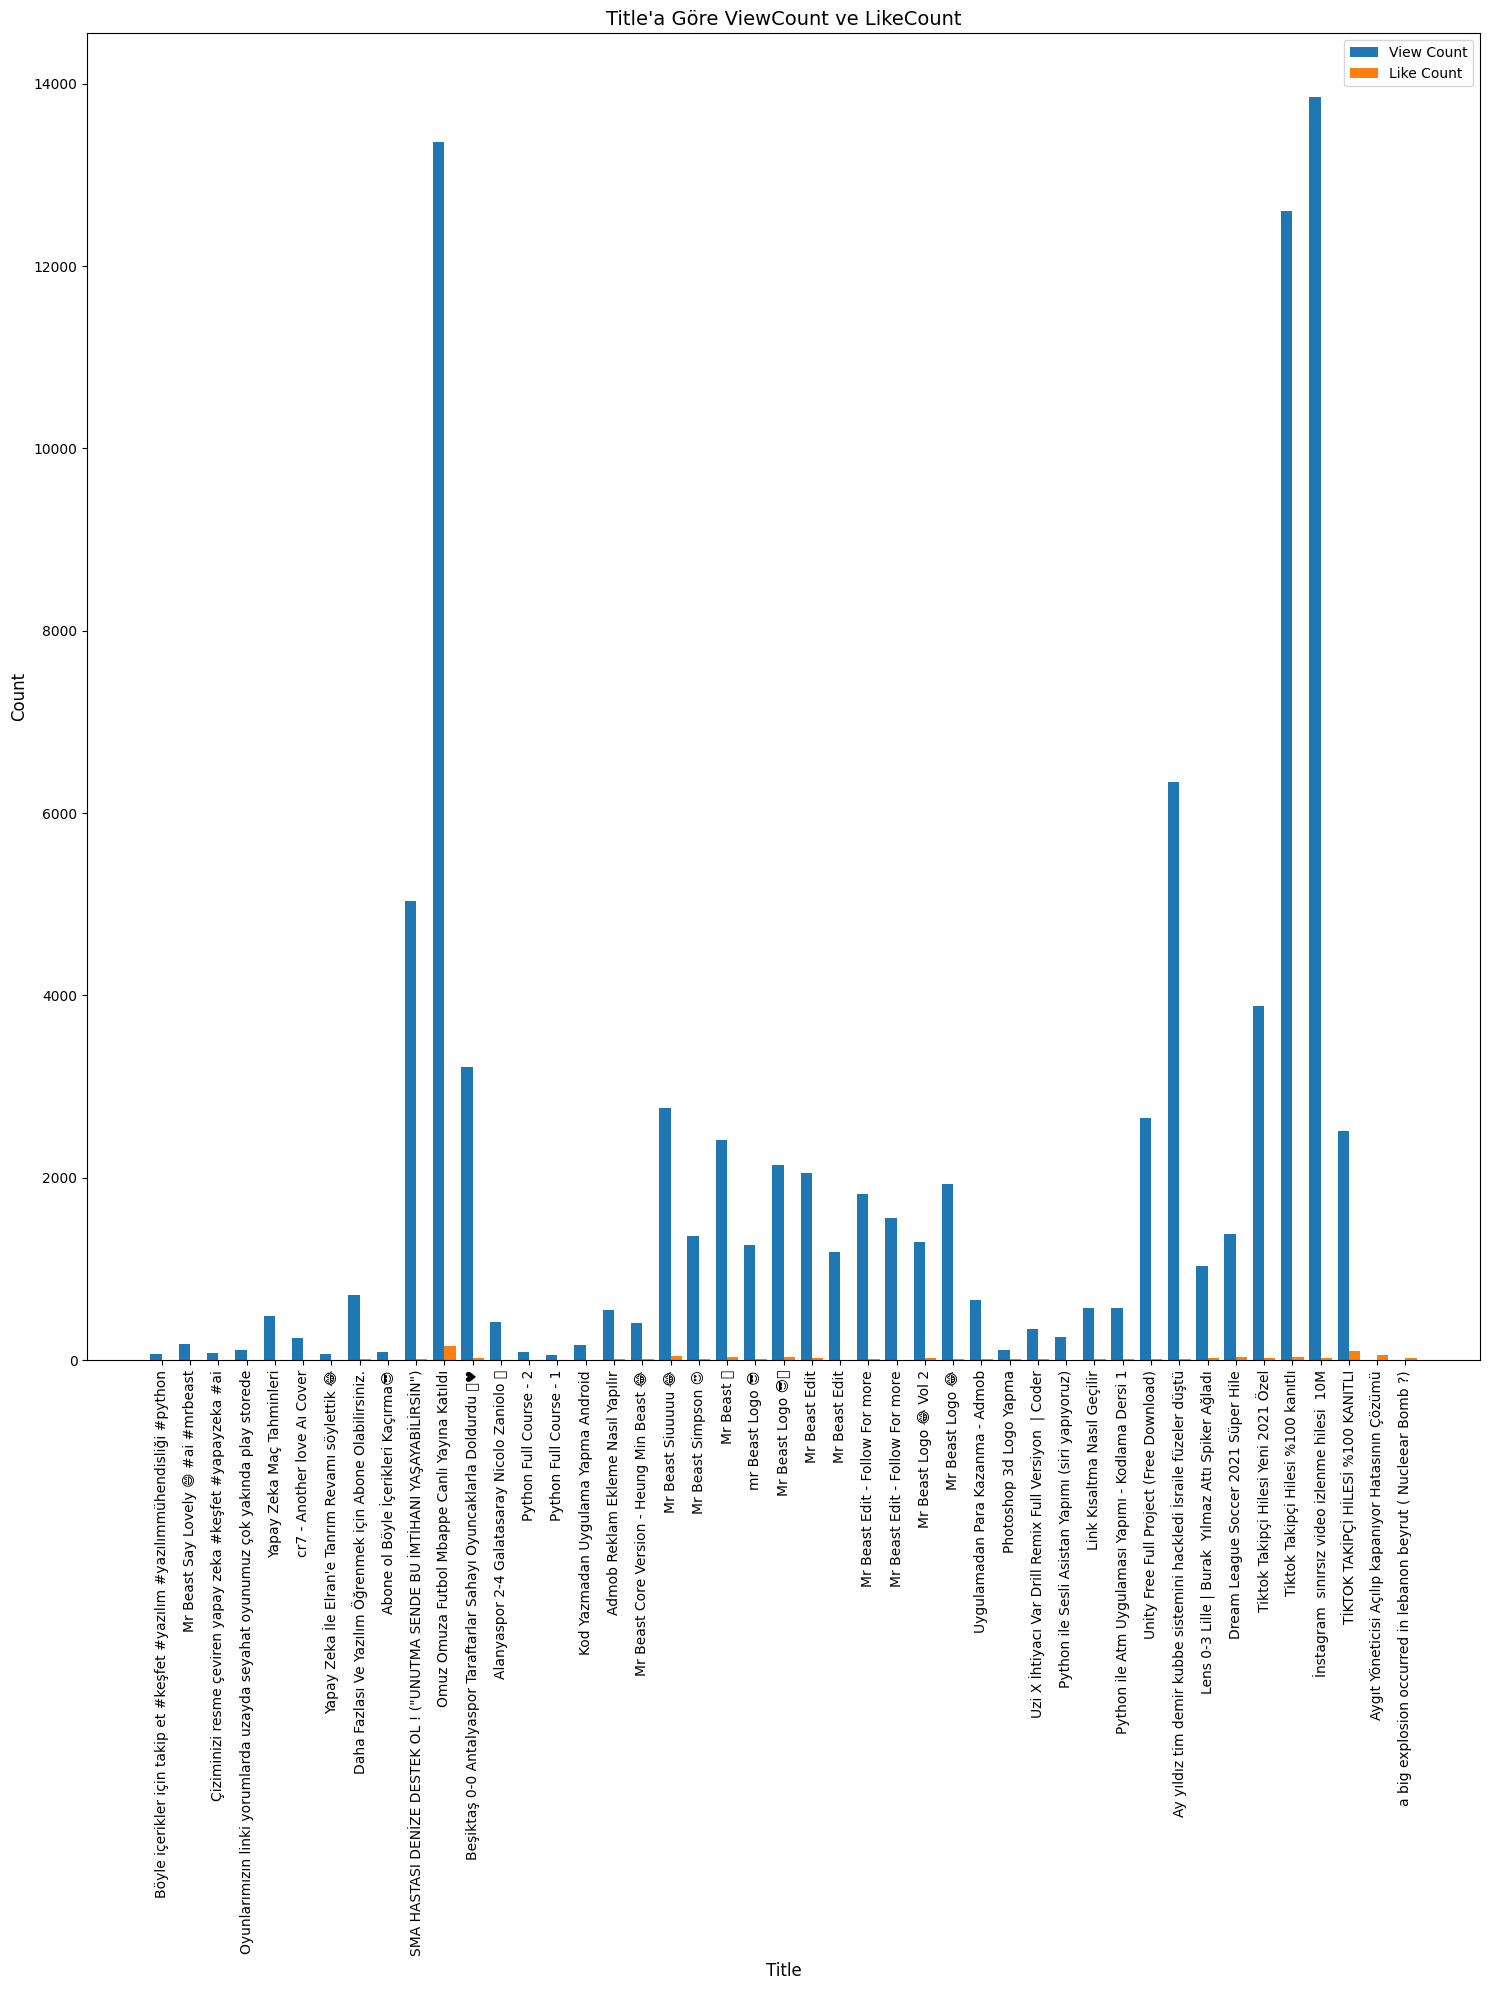

In [34]:
#başlıklara göre izlenme sayıları ve beğenme sayıları
titles = new_video_df['title']
view_counts = new_video_df['viewCount']
like_counts = new_video_df['likeCount']

# Her bir 'title' için 'viewCount' ve 'likeCount' değerlerini gösteren çubuk grafik oluşturma
plt.figure(figsize=(15, 20))

# İlk olarak 'viewCount' çubuk grafiğini çizelim
plt.bar(titles, view_counts, label='View Count', width=0.4)

# 'likeCount' çubuk grafiğini yanına çizelim, biraz sağa kaydıralım
plt.bar([i + 0.4 for i in range(len(titles))], like_counts, label='Like Count', width=0.4)

plt.xlabel('Title', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Title\'a Göre ViewCount ve LikeCount', fontsize=14)
plt.xticks([i + 0.2 for i in range(len(titles))], titles, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

Video başlıklarına göre izlenme sayıları gösterilmiştir. 

In [35]:
#title kısmında tags yer alıyor. Bu veriyi düzenlemek istiyorum
print(new_video_df['title'])

0     Böyle içerikler için takip et #keşfet #yazılım...
1                    Mr Beast Say Lovely 😄 #ai #mrbeast
2     Çiziminizi resme çeviren yapay zeka #keşfet #y...
3     Oyunlarımızın linki yorumlarda uzayda seyahat ...
4                             Yapay Zeka Maç Tahminleri
5                           cr7 - Another love Aı Cover
6      Yapay Zeka İle Elran'e Tanrım Revamı söylettik 😂
7     Daha Fazlası Ve Yazılım Öğrenmek için Abone Ol...
8                    Abone ol Böyle İçerikleri Kaçırma😎
9     SMA HASTASI DENİZE DESTEK OL ! ("UNUTMA SENDE ...
10        Omuz Omuza Futbol Mbappe Canlı Yayına Katıldı
11    Beşiktaş 0-0 Antalyaspor Taraftarlar Sahayı Oy...
12          Alanyaspor 2-4 Galatasaray Nicolo Zaniolo ✨
13                               Python Full Course - 2
14                               Python Full Course - 1
15                  Kod Yazmadan Uygulama Yapma Android
16                    Admob Reklam Ekleme Nasıl Yapılır
17            Mr Beast Core Version - Heung Min 

In [36]:
# '#' ile başlayan kelimeleri 'title' sütunundan ayıklayıp 'tags' sütununa atama yaptık
new_video_df['tags'] = new_video_df['title'].apply(lambda x: ','.join([tag for tag in x.split() if tag.startswith('#')]))

# '#' ile başlayan kelimeleri içeren 'tags' sütununu gösterdik
new_video_df[['title', 'tags']]

,title,tags
0,Böyle içerikler için takip et #keşfet #yazılım...,"#keşfet,#yazılım,#yazılımmühendisliği,#python"
1,Mr Beast Say Lovely 😄 #ai #mrbeast,"#ai,#mrbeast"
2,Çiziminizi resme çeviren yapay zeka #keşfet #y...,"#keşfet,#yapayzeka,#ai"
3,Oyunlarımızın linki yorumlarda uzayda seyahat ...,
4,Yapay Zeka Maç Tahminleri,
5,cr7 - Another love Aı Cover,
6,Yapay Zeka İle Elran'e Tanrım Revamı söylettik 😂,
7,Daha Fazlası Ve Yazılım Öğrenmek için Abone Ol...,
8,Abone ol Böyle İçerikleri Kaçırma😎,
9,"SMA HASTASI DENİZE DESTEK OL ! (""UNUTMA SENDE ...",


In [37]:
new_video_df.head()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,pushblishDayName,durationSecs,Keywords
0,OOnaU1NZ3D0,Coder,Böyle içerikler için takip et #keşfet #yazılım...,No Description,"#keşfet,#yazılım,#yazılımmühendisliği,#python",2023-09-07 11:15:14+00:00,63,1,None,1,PT32S,hd,false,Thursday,0 days 00:00:32,python
1,y84h9dpu23s,Coder,Mr Beast Say Lovely 😄 #ai #mrbeast,No Description,"#ai,#mrbeast",2023-09-02 10:21:23+00:00,183,2,None,0,PT37S,hd,false,Saturday,0 days 00:00:37,
2,cVLuYcOoeVM,Coder,Çiziminizi resme çeviren yapay zeka #keşfet #y...,No Description,"#keşfet,#yapayzeka,#ai",2023-09-02 09:38:46+00:00,81,1,None,2,PT47S,hd,false,Saturday,0 days 00:00:47,
3,wNFlLBdjOeY,Coder,Oyunlarımızın linki yorumlarda uzayda seyahat ...,No Description,,2023-08-15 07:48:35+00:00,117,4,None,1,PT11S,hd,false,Tuesday,0 days 00:00:11,
4,FigVM6f4Wh8,Coder,Yapay Zeka Maç Tahminleri,https://play.google.com/store/apps/details?id=...,,2023-08-15 07:43:29+00:00,487,2,None,2,PT2M19S,hd,false,Tuesday,0 days 00:02:19,


In [80]:
# tags sütununda boş olan hücrelere 'no tags' yazısı ekliyoruz
new_video_df['tags'] = new_video_df['tags'].apply(lambda x: 'no tags' if x == '' else x)

new_video_df.head()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,pushblishDayName,durationSecs,Keywords
0,OOnaU1NZ3D0,Coder,Böyle içerikler için takip et #keşfet #yazılım...,No Description,"#keşfet,#yazılım,#yazılımmühendisliği,#python",2023-09-07 11:15:14+00:00,63,1,None,1,PT32S,hd,false,Thursday,0 days 00:00:32,python
1,y84h9dpu23s,Coder,Mr Beast Say Lovely 😄 #ai #mrbeast,No Description,"#ai,#mrbeast",2023-09-02 10:21:23+00:00,183,2,None,0,PT37S,hd,false,Saturday,0 days 00:00:37,Mr Beast
2,cVLuYcOoeVM,Coder,Çiziminizi resme çeviren yapay zeka #keşfet #y...,No Description,"#keşfet,#yapayzeka,#ai",2023-09-02 09:38:46+00:00,81,1,None,2,PT47S,hd,false,Saturday,0 days 00:00:47,Yapay Zeka
3,wNFlLBdjOeY,Coder,Oyunlarımızın linki yorumlarda uzayda seyahat ...,No Description,no tags,2023-08-15 07:48:35+00:00,117,4,None,1,PT11S,hd,false,Tuesday,0 days 00:00:11,no info
4,FigVM6f4Wh8,Coder,Yapay Zeka Maç Tahminleri,https://play.google.com/store/apps/details?id=...,no tags,2023-08-15 07:43:29+00:00,487,2,None,2,PT2M19S,hd,false,Tuesday,0 days 00:02:19,Yapay Zeka


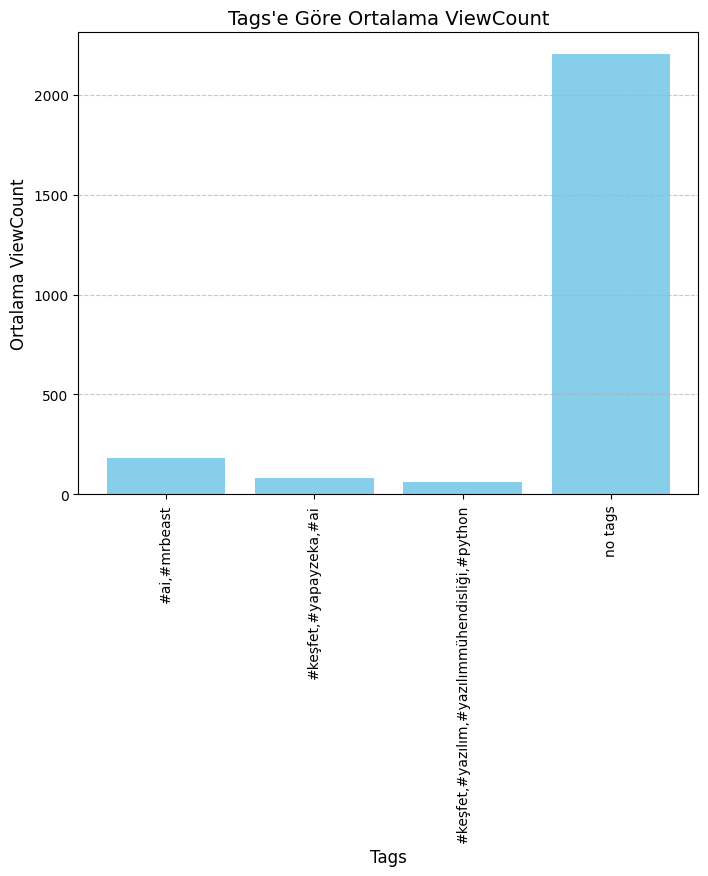

In [39]:
#Etiketlere göre izlenme sayılarını görmek için:
# tags kategorilerine göre viewCount'un ortalamasını hesaplayalım
grouped_data = new_video_df.groupby('tags')['viewCount'].mean().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(grouped_data['tags'], grouped_data['viewCount'], color='skyblue')
plt.title('Tags\'e Göre Ortalama ViewCount', fontsize=14)
plt.xlabel('Tags', fontsize=12)
plt.ylabel('Ortalama ViewCount', fontsize=12)
plt.xticks(rotation=90)  # x ekseni etiketlerini döndürmek için
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Bu grafikten tags kullanılmayan içeriklerin daha fazla izlendiği analizi yapılabilir

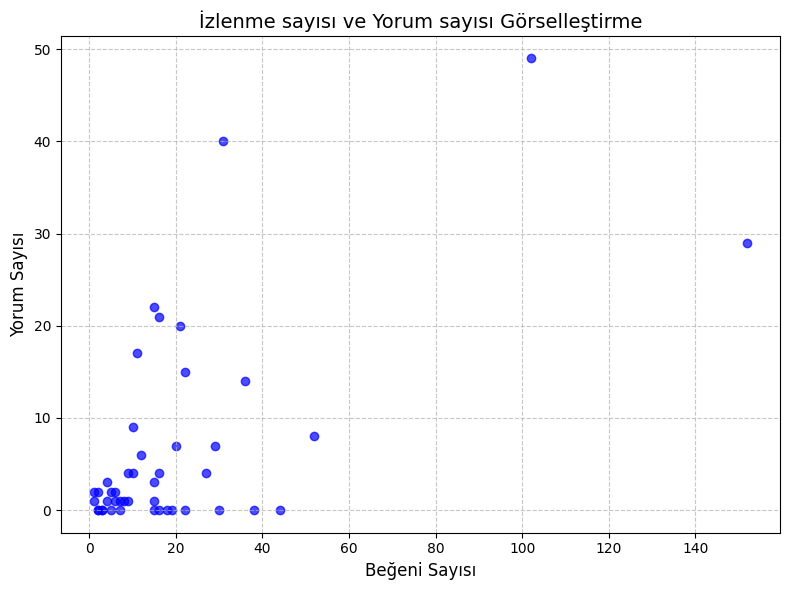

In [40]:
#Beğeni sayısına göre yorum sayılarını görselleştirdik
like_counts = new_video_df['likeCount']
comment_counts = new_video_df['commentCount']


plt.figure(figsize=(8, 6))
plt.scatter(like_counts, comment_counts, color='blue', alpha=0.7)
plt.title('İzlenme sayısı ve Yorum sayısı Görselleştirme', fontsize=14)
plt.xlabel('Beğeni Sayısı', fontsize=12)
plt.ylabel('Yorum Sayısı', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Kararlı bir şekilde olmamakla beraber beğeni sayısı arttığında yorum sayısının da arttığını söyleyebiliriz

In [41]:
input_video_id = input("Karşılaştırmak istediğiniz video ID'sini girin: ")

# Girilen video ID'sine karşılık gelen satırı seçiyoruz
selected_video = new_video_df[new_video_df['video_id'] == input_video_id]

# Seçilen videonun viewCount ve likeCount değerlerini alıyoruz
if not selected_video.empty:
    view_count = selected_video['viewCount'].values[0]
    like_count = selected_video['likeCount'].values[0]
    print(f"Video ID'si {input_video_id} olan videonun İzlenme Sayısı: {view_count}, Beğeni Sayısı: {like_count}")
else:
    print("Girilen video ID'sine karşılık gelen veri bulunamadı.")




Video ID'si FigVM6f4Wh8 olan videonun İzlenme Sayısı: 487, Beğeni Sayısı: 2


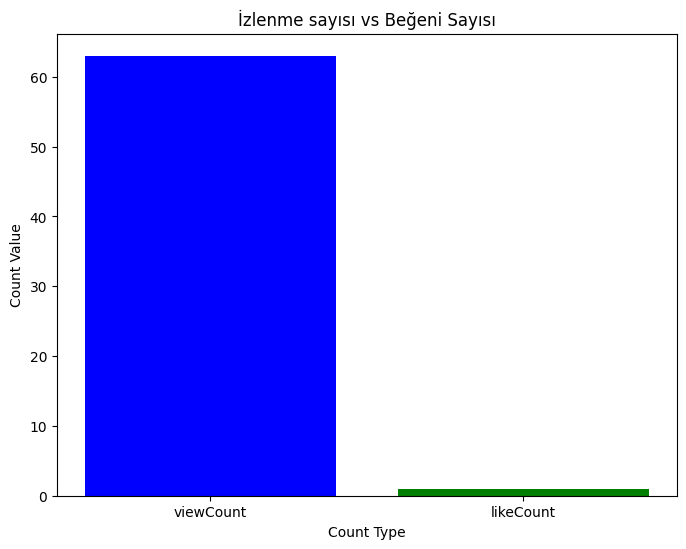

In [42]:
new_video_df['viewCount'] = new_video_df['viewCount'].astype(int)
new_video_df['likeCount'] = new_video_df['likeCount'].astype(int)


plt.figure(figsize=(8, 6))


view_count = new_video_df['viewCount'].iloc[0]  
like_count = new_video_df['likeCount'].iloc[0]  


plt.bar(['viewCount', 'likeCount'], [view_count, like_count], color=['blue', 'green'])
plt.xlabel('Count Type')
plt.ylabel('Count Value')
plt.title('İzlenme sayısı vs Beğeni Sayısı')


plt.show()

İzlenme sayısına göre beğeni sayısının düşük olan bir kanal olduğunu söyleyebiliriz

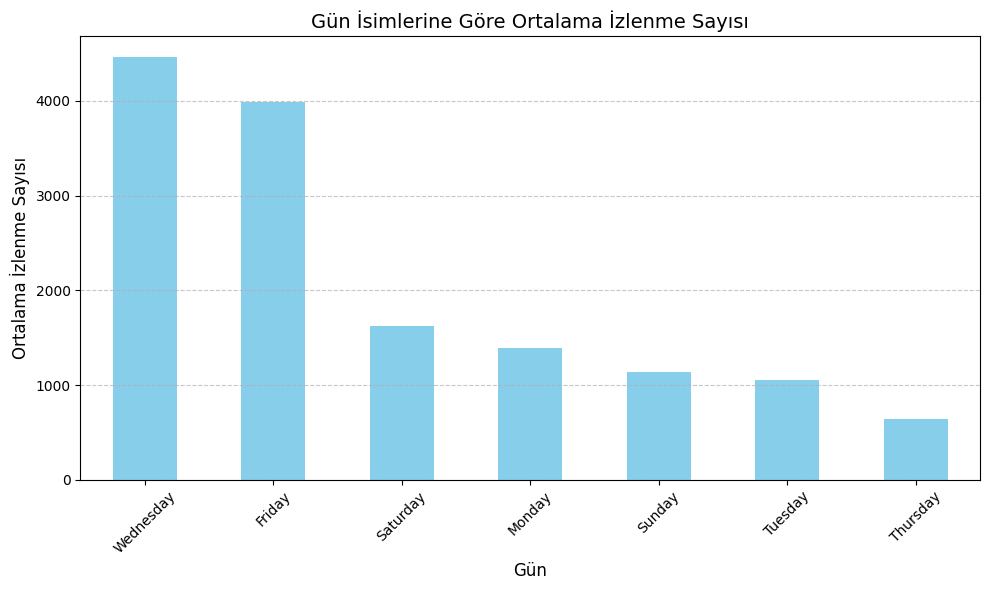

In [44]:
#Hangi günde atılan videolar daha çok izleniyor? Bunu görselleştirmek için:
avg_view_count_by_day = new_video_df.groupby('pushblishDayName')['viewCount'].mean().sort_values(ascending=False)

# Gün isimlerine göre 'viewCount' değerlerini çubuk grafikle göstermek için:
plt.figure(figsize=(10, 6))
avg_view_count_by_day.plot(kind='bar', color='skyblue')
plt.title('Gün İsimlerine Göre Ortalama İzlenme Sayısı', fontsize=14)
plt.xlabel('Gün', fontsize=12)
plt.ylabel('Ortalama İzlenme Sayısı', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Çarşamba günü atılan videoların daha fazla izlendiğini söyleyebiliriz.
Perşembe günü atılan videoların da en az izlenen videolar olduğu analizini yapabiliriz.

In [77]:
new_video_df.head()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,pushblishDayName,durationSecs,Keywords
0,OOnaU1NZ3D0,Coder,Böyle içerikler için takip et #keşfet #yazılım...,No Description,"#keşfet,#yazılım,#yazılımmühendisliği,#python",2023-09-07 11:15:14+00:00,63,1,None,1,PT32S,hd,false,Thursday,0 days 00:00:32,python
1,y84h9dpu23s,Coder,Mr Beast Say Lovely 😄 #ai #mrbeast,No Description,"#ai,#mrbeast",2023-09-02 10:21:23+00:00,183,2,None,0,PT37S,hd,false,Saturday,0 days 00:00:37,Mr Beast
2,cVLuYcOoeVM,Coder,Çiziminizi resme çeviren yapay zeka #keşfet #y...,No Description,"#keşfet,#yapayzeka,#ai",2023-09-02 09:38:46+00:00,81,1,None,2,PT47S,hd,false,Saturday,0 days 00:00:47,Yapay Zeka
3,wNFlLBdjOeY,Coder,Oyunlarımızın linki yorumlarda uzayda seyahat ...,No Description,no tags,2023-08-15 07:48:35+00:00,117,4,None,1,PT11S,hd,false,Tuesday,0 days 00:00:11,no info
4,FigVM6f4Wh8,Coder,Yapay Zeka Maç Tahminleri,https://play.google.com/store/apps/details?id=...,no tags,2023-08-15 07:43:29+00:00,487,2,None,2,PT2M19S,hd,false,Tuesday,0 days 00:02:19,Yapay Zeka


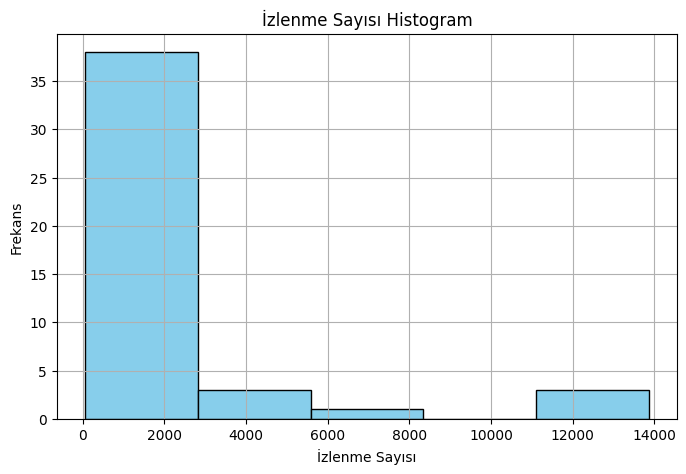

In [88]:
# 'viewCount' için histogram oluşturalım
plt.figure(figsize=(8, 5))
plt.hist(new_video_df['viewCount'], bins=5, color='skyblue', edgecolor='black')
plt.xlabel('İzlenme Sayısı')
plt.ylabel('Frekans')
plt.title('İzlenme Sayısı Histogram')
plt.grid(True)
plt.show()


Histograma bakarak genel olarak videoların 0-2500 arası izlenme aldığı söylenebilir.

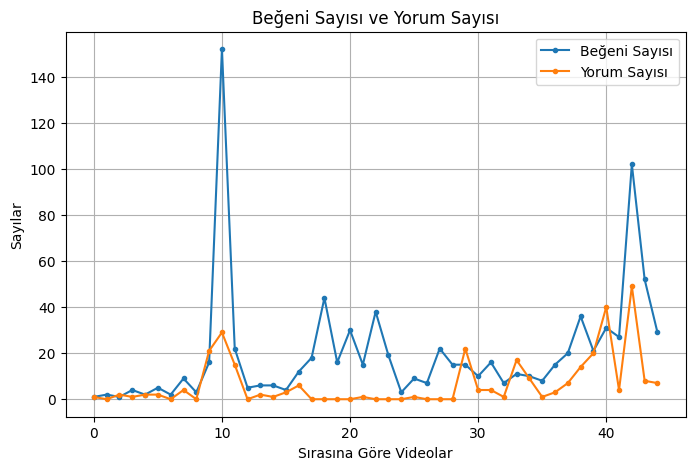

In [87]:

# Beğeni sayısı ve yorum sayısı karşılaştırması için:
plt.figure(figsize=(8, 5))

plt.plot(new_video_df['likeCount'], label='Beğeni Sayısı', marker='.')
plt.plot(new_video_df['commentCount'], label='Yorum Sayısı', marker='.')

plt.xlabel('Sırasına Göre Videolar')
plt.ylabel('Sayılar')
plt.title('Beğeni Sayısı ve Yorum Sayısı')
plt.legend()
plt.grid(True)
plt.show()

Bu grafiğe bakarak genellikle beğeni sayısı fazla olan videoların yorum sayısının da fazla olduğu görülmektedir.

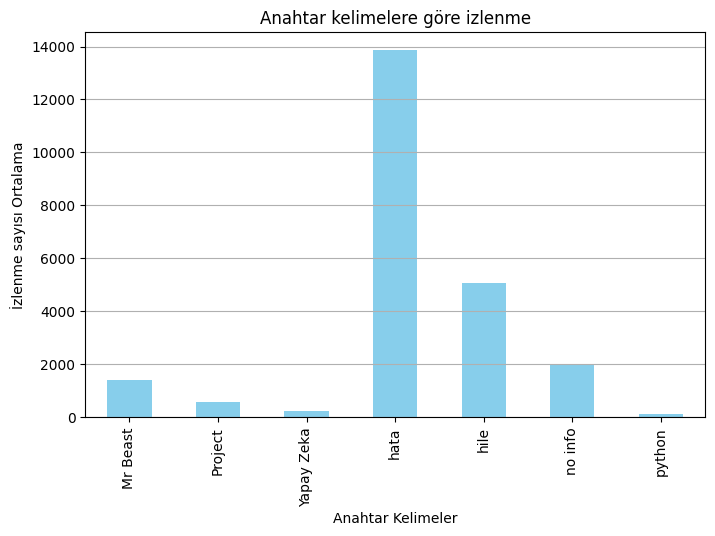

In [84]:
# Keywords'a göre viewCount değerlerinin çubuk grafik ile gösterilmesi
plt.figure(figsize=(8, 5))
new_video_df.groupby('Keywords')['viewCount'].mean().plot(kind='bar', color='skyblue')
plt.xlabel('Anahtar Kelimeler')
plt.ylabel('İzlenme sayısı Ortalama')
plt.title('Anahtar kelimelere göre izlenme')
plt.grid(axis='y')
plt.show()

Anahtar kelimelere göre bu kanal, en çok izlenme sayısını 'hata' anahtar kelimesini kullandığı videolarda almıştır.

# Genel Analiz
- İzlenme sayısı yüksek olan videoların beğeni ve yorum sayısı genellikle daha yüksek.
- Bu kanalın izleyicileri genel olarak çarşamba günü atılan videoları daha fazla izliyor.
- En az izlenme oranı Perşembe günü.
- Anahtar kelimelere göre izlenme oranları en fazla olan anahtar kelime 'hata' dır.